# Importar Librerías

## Instalar librerías necesarias para usar GeoPandas

In [1]:
#conda install geopandas
#conda install mapclassify
#conda install folium -U
#conda install pygeos
#conda install pyproj

## Importar bibliotecas generales

In [2]:
import numpy as np
import pandas as pd
import glob, os

## Importar librerías GeoPandas

In [3]:
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import folium
import mapclassify
import pygeos
import pyproj

C:\Users\copor\anaconda3_2\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


# Importación de Datos

## Ubigeos
Se consultó el portal Datos Abiertos
Url: https://www.datosabiertos.gob.pe/dataset/poblaci%C3%B3n-peru
En este portal se indica que la fuente es: https://github.com/jmcastagnetto/ubigeo-peru-aumentado
Se consultó la fuente en GitHub para poder importar los datos directamente, sin necesidad de descargarlos localmente.


### Distrital

In [4]:
url = "https://raw.githubusercontent.com/jmcastagnetto/ubigeo-peru-aumentado/main/ubigeo_distrito.csv"
dist = pd.read_csv(url)
dist.head()

,inei,reniec,departamento,provincia,distrito,region,macroregion_inei,macroregion_minsa,iso_3166_2,fips,capital,superficie,pob_densidad_2020,altitude,latitude,longitude,indice_vulnerabilidad_alimentaria,idh_2019,pct_pobreza_total,pct_pobreza_extrema
0,10101.0,10101.0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,Chachapoyas,153.78,201.43711796072299,2338.0,-6.229444,-77.872778,0.279657,0.642361,9.034625,1.439875
1,10102.0,10102.0,AMAZONAS,CHACHAPOYAS,ASUNCION,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,Asunción,25.71,13.9634383508363,2823.0,-6.032500,-77.710833,0.558549,0.423032,36.519949,15.680750
2,10103.0,10103.0,AMAZONAS,CHACHAPOYAS,BALSAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,Balsas,357.09,4.0465988966367004,859.0,-6.835833,-78.019722,0.646749,0.315308,45.732962,15.427120
3,10104.0,10104.0,AMAZONAS,CHACHAPOYAS,CHETO,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,Cheto,56.97,13.568544848165701,2143.0,-6.255556,-77.700833,0.530846,0.345746,39.169782,23.678410
4,10105.0,10105.0,AMAZONAS,CHACHAPOYAS,CHILIQUIN,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,Chiliquín,143.43,6.8326012689116604,2677.0,-6.078333,-77.737500,0.706854,0.275038,53.045662,36.395370


In [5]:
dist.columns

Index(['inei', 'reniec', 'departamento', 'provincia', 'distrito', 'region',
       'macroregion_inei', 'macroregion_minsa', 'iso_3166_2', 'fips',
       'capital', 'superficie', 'pob_densidad_2020', 'altitude', 'latitude',
       'longitude', 'indice_vulnerabilidad_alimentaria', 'idh_2019',
       'pct_pobreza_total', 'pct_pobreza_extrema'],
      dtype='object')

In [6]:
dist_ = dist[['inei', 'altitude']]
dist_.head()

,inei,altitude
0,10101.0,2338.0
1,10102.0,2823.0
2,10103.0,859.0
3,10104.0,2143.0
4,10105.0,2677.0


In [7]:
dist_.dtypes

inei        float64
altitude    float64
dtype: object

### Departamental

In [8]:
url_dpto = "https://raw.githubusercontent.com/jmcastagnetto/ubigeo-peru-aumentado/main/ubigeo_departamento.csv"
dpto = pd.read_csv(url_dpto)
dpto.head()

,inei,reniec,departamento,iso_3166_2,fips,capital,superficie,pob_densidad_2020,altitude,latitude,longitude,indice_densidad_estado,indice_vulnerabilidad_alimentaria,idh_2019,pct_pobreza_total,pct_pobreza_extrema
0,10000,10000,AMAZONAS,PE-AMA,1,Chachapoyas,39249.13,12.051044,2338.0,-6.229444,-77.872778,0.662895,0.868360,0.417736,32.95,7.30
1,20000,20000,ANCASH,PE-ANC,2,Huaraz,35881.30,34.732549,3073.0,-9.529722,-77.529167,0.735137,0.501994,0.515934,32.95,3.05
2,30000,30000,APURIMAC,PE-APU,3,Abancay,20895.77,22.029148,2500.0,-13.628889,-72.886111,0.743276,0.568467,0.410926,32.95,7.30
3,40000,40000,AREQUIPA,PE-ARE,4,Arequipa,63343.95,24.568187,2429.0,-16.393333,-71.528889,0.801220,0.237851,0.642545,17.30,3.05
4,50000,50000,AYACUCHO,PE-AYA,5,Ayacucho,43803.26,15.753462,2797.0,-13.160278,-74.225278,0.731842,0.524958,0.432741,43.65,12.95


In [9]:
dpto.columns

Index(['inei', 'reniec', 'departamento', 'iso_3166_2', 'fips', 'capital',
       'superficie', 'pob_densidad_2020', 'altitude', 'latitude', 'longitude',
       'indice_densidad_estado', 'indice_vulnerabilidad_alimentaria',
       'idh_2019', 'pct_pobreza_total', 'pct_pobreza_extrema'],
      dtype='object')

In [10]:
dpto_ = dpto[['departamento','superficie','pob_densidad_2020', 'indice_densidad_estado', 'indice_vulnerabilidad_alimentaria','idh_2019', 'pct_pobreza_total', 'pct_pobreza_extrema']]
dpto_.head()

,departamento,superficie,pob_densidad_2020,indice_densidad_estado,indice_vulnerabilidad_alimentaria,idh_2019,pct_pobreza_total,pct_pobreza_extrema
0,AMAZONAS,39249.13,12.051044,0.662895,0.868360,0.417736,32.95,7.30
1,ANCASH,35881.30,34.732549,0.735137,0.501994,0.515934,32.95,3.05
2,APURIMAC,20895.77,22.029148,0.743276,0.568467,0.410926,32.95,7.30
3,AREQUIPA,63343.95,24.568187,0.801220,0.237851,0.642545,17.30,3.05
4,AYACUCHO,43803.26,15.753462,0.731842,0.524958,0.432741,43.65,12.95


## Data GeoPandas

### Distrital

In [11]:
url_geojson_distrital = "https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_distrital_simple.geojson"

In [12]:
dist_gdf = gpd.read_file(url_geojson_distrital)
dist_gdf.iloc[:,:-1].head()

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM
0,1,230110,23,2301,CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,LEY,27415,02/02/2001,ALFONSO UGARTE,0.570510,0.016140,0.570195,0.015990,18834.14
1,2,230108,23,2301,POCOLLAY,TACNA,TACNA,LEY,13069,15/01/1959,POCOLLAY,0.883871,0.022816,0.897169,0.022961,27073.52
2,3,230103,23,2301,CALANA,TACNA,TACNA,LEY,S/N,20/08/1872,CALANA,0.446736,0.009458,0.445963,0.009383,11063.99
3,4,230101,23,2301,TACNA,TACNA,TACNA,-,-,EPOCA INDEP.,TACNA,2.758951,0.209156,2.758123,0.209177,246365.27
4,5,230109,23,2301,SAMA,TACNA,TACNA,-,-,EPOCA INDEP.,LAS YARAS,1.515506,0.096789,1.513660,0.096766,113953.51


In [13]:
dist_gdf.dtypes

OBJECTID         int64
IDDIST          object
IDDPTO          object
IDPROV          object
NOMBDIST        object
NOMBPROV        object
NOMBDEP         object
DCTO            object
LEY             object
FECHA           object
NOM_CAP         object
SHAPE_LENG     float64
SHAPE_AREA     float64
SHAPE_LE_1     float64
SHAPE_AR_1     float64
AREA_MINAM     float64
geometry      geometry
dtype: object

Se comvierte IDDIST de geojson para poder hacer el cruce con ubigeo de la data de distritos

In [14]:
dist_gdf['IDDIST'] = dist_gdf['IDDIST'].astype('float')

Se agrega el dato de altitud al GeoDataFrame (gdf) de distritos

In [15]:
dist_gdf = dist_gdf.merge(dist_, how='left', right_on='inei', left_on='IDDIST')
dist_gdf.drop(['inei'],axis=1,inplace=True)
dist_gdf.head()

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,altitude
0,1,230110.0,23,2301,CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,LEY,27415,02/02/2001,ALFONSO UGARTE,0.570510,0.016140,0.570195,0.015990,18834.14,"POLYGON ((-70.14409 -18.09309, -70.17512 -18.1...",562.0
1,2,230108.0,23,2301,POCOLLAY,TACNA,TACNA,LEY,13069,15/01/1959,POCOLLAY,0.883871,0.022816,0.897169,0.022961,27073.52,"POLYGON ((-69.90467 -17.95829, -69.98287 -18.0...",690.0
2,3,230103.0,23,2301,CALANA,TACNA,TACNA,LEY,S/N,20/08/1872,CALANA,0.446736,0.009458,0.445963,0.009383,11063.99,"POLYGON ((-70.09201 -17.98026, -70.17243 -18.0...",881.0
3,4,230101.0,23,2301,TACNA,TACNA,TACNA,-,-,EPOCA INDEP.,TACNA,2.758951,0.209156,2.758123,0.209177,246365.27,"POLYGON ((-70.23500 -17.99231, -70.23710 -18.0...",583.0
4,5,230109.0,23,2301,SAMA,TACNA,TACNA,-,-,EPOCA INDEP.,LAS YARAS,1.515506,0.096789,1.513660,0.096766,113953.51,"POLYGON ((-70.42374 -17.88983, -70.51323 -17.9...",397.0


Para evitar errores al graficar se retiran aquellos registros que no tienen un dato de Geometría

In [16]:
print('Existen {} registros sin dato de geoemetría'.format(dist_gdf['geometry'].isnull().sum()))

Existen 8 registros sin dato de geoemetría


Sin embargo, se detecta que existen otros campos vacíos para otras varibles

In [17]:
pd.DataFrame([(c,dist_gdf[c].isnull().sum())  for c in dist_gdf.columns if dist_gdf[c].isnull().sum() > 0], columns=(['Variable','Nulos']))

,Variable,Nulos
0,DCTO,1
1,LEY,1
2,geometry,8
3,altitude,2


Se valida que no hay coincidencia entre los vacíos de geometry y el resto de variables

In [18]:
dist_gdf[dist_gdf['geometry'].isnull()]

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,altitude
175,176,210103.0,21,2101,AMANTANI,PUNO,PUNO,LEY,15489,09/04/1965,AMANTANI,0.233210,0.001167,0.233210,0.001167,1394.26,None,3871.0
389,1687,10204.0,01,0102,EL PARCO,BAGUA,AMAZONAS,LEY,9364,01/09/1941,EL PARCO,0.121477,0.001162,0.175503,0.001483,1821.76,None,626.0
819,786,70105.0,07,0701,LA PUNTA,CALLAO,CALLAO,LEY,2141,06/10/1915,LA PUNTA,0.055846,0.000064,0.055847,0.000064,77.27,None,29.0
843,810,150137.0,15,1501,SANTA ANITA,LIMA,LIMA,LEY,25116,25/10/1989,SANTA ANITA - LOS FICUS,0.144693,0.000893,0.142986,0.000886,1067.91,None,285.0
963,930,190203.0,19,1902,GOYLLARISQUIZGA,DANIEL ALCIDES CARRION,PASCO,LEY,10030,27/11/1944,GOYLLARISQUIZGA,0.180999,0.001544,0.189470,0.001595,1930.72,None,4202.0
1207,1174,20602.0,02,0206,ACOPAMPA,CARHUAZ,ANCASH,LEY,9456,05/12/1941,ACOPAMPA,0.153805,0.001229,0.149493,0.001199,1458.97,None,2692.0
1641,1608,10523.0,01,0105,TRITA,LUYA,AMAZONAS,LEY,13383,12/02/1960,TRITA,0.149939,0.001041,0.150020,0.001056,1295.10,None,2888.0
1753,1754,200602.0,20,2006,BELLAVISTA,SULLANA,PIURA,LEY,12140,09/11/1954,BELLAVISTA,0.053010,0.000163,0.053002,0.000163,201.30,None,77.0


Los vacíos de DCTO y LEY coinciden, se podrían omitir los datos pero **se simula un escenario donde es necesario mantener estos registros (los que tienen vacíos en DCTO y LEY)**

In [19]:
dist_gdf[dist_gdf['DCTO'].isnull()]

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,altitude
1555,1522,140305.0,14,1403,MOCHUMI,LAMBAYEQUE,LAMBAYEQUE,None,None,EPOCA INDEP.,MOCHUMI,0.464824,0.008425,0.46436,0.008395,10333.44,"POLYGON ((-79.82980 -6.57110, -79.84154 -6.595...",40.0


Se valida que no se trató de un error en el cruce, ambos ubigeos existen en ambas tablas. Sin embargo, el campo altitud esta vacío en la tabla de ubigeos

In [20]:
dist_gdf[dist_gdf['altitude'].isnull()]

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,altitude
1831,1832,160109.0,16,1601,PUTUMAYO,MAYNAS,LORETO,LEY,9815,02/07/1943,SAN ANTONIO DEL ESTRECHO,16.256407,2.884865,16.232424,2.884722,3555516.31,"POLYGON ((-73.53075 -1.45793, -73.47857 -1.522...",NaN
1833,1834,160114.0,16,1601,TENIENTE MANUEL CLAVERO,MAYNAS,LORETO,LEY,28362,19/10/2004,S0PLIN VARGAS,7.442130,0.742758,7.429279,0.741488,911972.65,"POLYGON ((-73.53075 -1.45793, -73.58899 -1.460...",NaN


Se decide imputar la data utilizando el promedio de las alturas del resto de distritos en MAYNAS

In [21]:
dist[dist['inei'].isin([160109.0,160114])]

,inei,reniec,departamento,provincia,distrito,region,macroregion_inei,macroregion_minsa,iso_3166_2,fips,capital,superficie,pob_densidad_2020,altitude,latitude,longitude,indice_vulnerabilidad_alimentaria,idh_2019,pct_pobreza_total,pct_pobreza_extrema
1472,160109.0,150107.0,LORETO,MAYNAS,PUTUMAYO,LORETO,ORIENTE,MACROREGION ORIENTE,PE-LOR,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1476,160114.0,150114.0,LORETO,MAYNAS,TENIENTE MANUEL CLAVERO,LORETO,ORIENTE,MACROREGION ORIENTE,PE-LOR,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
mean_alt_maynas = dist_gdf[dist_gdf['NOMBPROV'] == 'MAYNAS']['altitude'].mean()
print('La altitud promedio de los distritos en Maynas es {:.2f}'.format(mean_alt_maynas))

La altitud promedio de los distritos en Maynas es 123.00


Se genera un DataFrame en el cual se toma la media solo para los registros que no cuentan con información. para el resto de casos se toma el valor de altitud real

In [23]:
input_data = pd.DataFrame([(dist_gdf['NOMBDIST'].iloc[i], mean_alt_maynas, 'mean') if i in [1831,1833] else (dist_gdf['NOMBDIST'].iloc[i], dist_gdf['altitude'].iloc[i],'real') for i in range(dist_gdf.shape[0])],
                    columns=['distrito','altitude','tipo_dato'])
input_data[input_data['tipo_dato']=='mean']

,distrito,altitude,tipo_dato
1831,PUTUMAYO,123.0,mean
1833,TENIENTE MANUEL CLAVERO,123.0,mean


In [24]:
dist_gdf['altitude'] = input_data['altitude']

In [25]:
dist_gdf[dist_gdf.index.isin([1831,1833])] 

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,altitude
1831,1832,160109.0,16,1601,PUTUMAYO,MAYNAS,LORETO,LEY,9815,02/07/1943,SAN ANTONIO DEL ESTRECHO,16.256407,2.884865,16.232424,2.884722,3555516.31,"POLYGON ((-73.53075 -1.45793, -73.47857 -1.522...",123.0
1833,1834,160114.0,16,1601,TENIENTE MANUEL CLAVERO,MAYNAS,LORETO,LEY,28362,19/10/2004,S0PLIN VARGAS,7.442130,0.742758,7.429279,0.741488,911972.65,"POLYGON ((-73.53075 -1.45793, -73.58899 -1.460...",123.0


Finalmente, se eliminan solo aquellos registros con datos vacíos en el campo geometry. Para ello, se utilizan los indices.

In [26]:
r_todrop= dist_gdf[dist_gdf['geometry'].isnull()].index
r_todrop

Int64Index([175, 389, 819, 843, 963, 1207, 1641, 1753], dtype='int64')

In [27]:
dist_gdf.drop(r_todrop,axis=0,inplace=True)

In [28]:
dist_gdf = dist_gdf.reset_index()

Luego de estos pasos, sólo se encuentran nulos en los campos DCTO y LEY

In [29]:
pd.DataFrame([(c,dist_gdf[c].isnull().sum())  for c in dist_gdf.columns if dist_gdf[c].isnull().sum() > 0], columns=(['Variable','Nulos']))

,Variable,Nulos
0,DCTO,1
1,LEY,1


### Departamental

In [30]:
url_geojson_dptos = "https://raw.githubusercontent.com/juaneladio/peru-geojson/master/peru_departamental_simple.geojson"

In [31]:
dpto_gdf = gpd.read_file(url_geojson_dptos)
dpto_gdf.iloc[:,:-1].head() #Sin mostrar el campo geometry

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES
0,AMAZONAS,84,01,3930646.567
1,ANCASH,166,02,3596224.600
2,APURIMAC,80,03,2111415.170
3,AREQUIPA,109,04,6325588.935
4,AYACUCHO,111,05,4350381.783


In [32]:
dpto_.head()

,departamento,superficie,pob_densidad_2020,indice_densidad_estado,indice_vulnerabilidad_alimentaria,idh_2019,pct_pobreza_total,pct_pobreza_extrema
0,AMAZONAS,39249.13,12.051044,0.662895,0.868360,0.417736,32.95,7.30
1,ANCASH,35881.30,34.732549,0.735137,0.501994,0.515934,32.95,3.05
2,APURIMAC,20895.77,22.029148,0.743276,0.568467,0.410926,32.95,7.30
3,AREQUIPA,63343.95,24.568187,0.801220,0.237851,0.642545,17.30,3.05
4,AYACUCHO,43803.26,15.753462,0.731842,0.524958,0.432741,43.65,12.95


In [33]:
dpto_gdf = dpto_gdf.merge(dpto_, how='left', left_on='NOMBDEP', right_on='departamento')
dpto_gdf.drop(['departamento'],axis=1, inplace=True)
pd.DataFrame([(c,dpto_gdf[c].isnull().sum())  for c in dpto_gdf.columns if dpto_gdf[c].isnull().sum() > 0], columns=(['Variable','Nulos']))

,Variable,Nulos


In [34]:
dpto_gdf.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,superficie,pob_densidad_2020,indice_densidad_estado,indice_vulnerabilidad_alimentaria,idh_2019,pct_pobreza_total,pct_pobreza_extrema
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",39249.13,12.051044,0.662895,0.868360,0.417736,32.95,7.30
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",35881.30,34.732549,0.735137,0.501994,0.515934,32.95,3.05
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...",20895.77,22.029148,0.743276,0.568467,0.410926,32.95,7.30
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",63343.95,24.568187,0.801220,0.237851,0.642545,17.30,3.05
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",43803.26,15.753462,0.731842,0.524958,0.432741,43.65,12.95


# Graficar Mapas
GeoPandas, Documentación disponible en:https://geopandas.org/en/stable/index.html

## Mapa Estático

Se genera un mapa coropletico de 3 capas donde se mostrará:
* 1ra Capa: Altitudes por Ubigeo (Distrito)
* 2da Capa: Centrodides con tamaño en relación al % de Probreza Extrema
* 3ra Capa: Contrornos de Departamentos del Perú

In [35]:
buffer = 'pct_pobreza_extrema'
dpto_gdf[['NOMBDEP',buffer]]

,NOMBDEP,pct_pobreza_extrema
0,AMAZONAS,7.30
1,ANCASH,3.05
2,APURIMAC,7.30
3,AREQUIPA,3.05
4,AYACUCHO,12.95
5,CAJAMARCA,12.95
6,CALLAO,3.05
7,CUSCO,7.30
8,HUANCAVELICA,12.95
9,HUANUCO,12.95


**2da Capa**
Para tal efecto, es necesario generar dos variables nuevas:
* La primera tendrá el dato geométrico de los centroides por departamento.
* La segunda será en centroide re-escalado en función a la variable "pct_pobreza_extrema"  (% de pobreza extrema)

In [36]:
dpto_gdf['centroid'] = dpto_gdf.centroid# Obtener Centroides
dpto_gdf['centroid_buff'] = dpto_gdf.centroid.buffer(dpto_gdf[buffer]*.05) #Re-Escalar Centroides

C:\Users\copor\AppData\Local\Temp\ipykernel_4456\888713228.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dpto_gdf['centroid'] = dpto_gdf.centroid# Obtener Centroides
C:\Users\copor\AppData\Local\Temp\ipykernel_4456\888713228.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dpto_gdf['centroid_buff'] = dpto_gdf.centroid.buffer(dpto_gdf[buffer]*.05) #Re-Escalar Centroides
C:\Users\copor\AppData\Local\Temp\ipykernel_4456\888713228.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dpto_gdf['centroid_buff'] = dpto_gdf.centroid.buffer(dpto_gdf[buffer]*.05) #Re-Escalar 

**3ra Capa:** Se generá una variable con el dato del contorno por departamento

In [37]:
dpto_gdf['boundary'] = dpto_gdf.boundary # Contornos

**Ploteo (Graficar)**

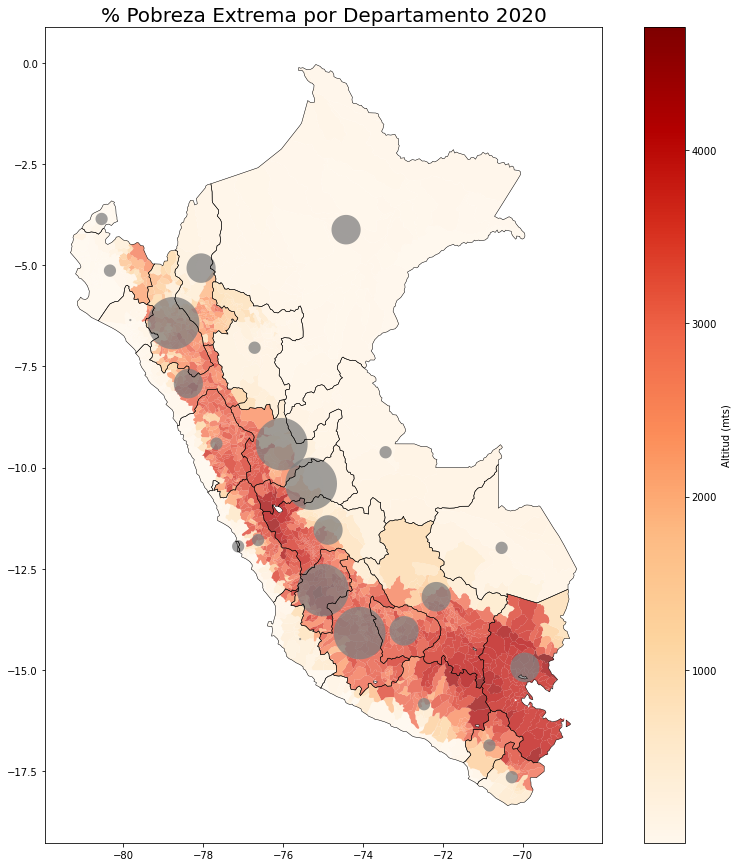

In [38]:
#1ra Capa Altitudes
ax = dist_gdf.plot('altitude', figsize=(15,15),legend=True, cmap='OrRd', alpha=.75, legend_kwds={'label': "Altitud (mts)"})

#2da Capa Centrodides en Escala al % de Pobreza Extrema
dpto_gdf = dpto_gdf.set_geometry('centroid_buff')
dpto_gdf.plot(ax=ax,color='gray', alpha=.75)

#3ra Capa Contorno de los Departamentos
dpto_gdf = dpto_gdf.set_geometry('boundary')
dpto_gdf['boundary'].plot(ax=ax,color='black',linewidth=.5)

ax.set_title('% Pobreza Extrema por Departamento 2020', fontdict={'fontsize':20})
plt.show()

## Mapa Interactivo

En caso no pueda visualizar los mapas interactivos consultar url Colab: https://colab.research.google.com/drive/12Ymj0uhDyPQmi1Qm5mwZvZcoFMMApD1b#scrollTo=IXsE0jBh38IP


Se genera un mapa interactivo de 3 capas donde se mostrará:

* 1ra Capa: Altitudes por Ubigeo (Distrito)
* 2da Capa: Contrornos de Departamentos del Perú
* 3ra Capa: Centrodides con tamaño en relación al % de Probreza Extrema

Se genera un nuevo GeoDataFrame con información del centroide por departamento y variable objetivo (pct_pobreza_extrema)

In [39]:
cntrds_gdf = dpto_gdf[['pct_pobreza_extrema','centroid_buff']] #Nuevo GeoDataFrame
cntrds_gdf['pct_pobreza_extrema'] = ['{:.2f}%'.format(v) for v in cntrds_gdf['pct_pobreza_extrema']] #Dar Formato a la Variable Objetivo
cntrds_gdf.rename(columns={'pct_pobreza_extrema':'% Pobreza Extrema'},inplace=True) #Renombrar la variable para que al mostrarla en la visualización sea de fácil entendimiento
cntrds_gdf = cntrds_gdf.set_geometry('centroid_buff')#Establecer como dato geométrico el centroido escalado

C:\Users\copor\AppData\Local\Temp\ipykernel_4456\2337310473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntrds_gdf['pct_pobreza_extrema'] = ['{:.2f}%'.format(v) for v in cntrds_gdf['pct_pobreza_extrema']] #Dar Formato a la Variable Objetivo
C:\Users\copor\AppData\Local\Temp\ipykernel_4456\2337310473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cntrds_gdf.rename(columns={'pct_pobreza_extrema':'% Pobreza Extrema'},inplace=True) #Renombrar la variable para que al mostrarla en la visualización sea de fácil entendimiento


In [40]:
cntrds_gdf.head()

,% Pobreza Extrema,centroid_buff
0,7.30%,"POLYGON ((-77.68898 -5.06930, -77.69074 -5.105..."
1,3.05%,"POLYGON ((-77.51762 -9.40611, -77.51836 -9.421..."
2,7.30%,"POLYGON ((-72.60921 -14.03005, -72.61097 -14.0..."
3,3.05%,"POLYGON ((-72.32282 -15.84261, -72.32356 -15.8..."
4,12.95%,"POLYGON ((-73.43822 -14.08550, -73.44134 -14.1..."


Prueba del mapa interactivo para el dato Centroide. Como se observa al colocar el cursor sobre el punto este muestra el % de probreza extrema

In [41]:
m = cntrds_gdf.explore(    
     color="gray", # use red color on all points     
     tooltip='% Pobreza Extrema', # show "name" column in the tooltip    
     name="departamentos" # name of the layer in the map
)
m

**Graficar las 3 Capas**

In [49]:
#1ra Capa Altitudes
alts = dist_gdf.explore(
    column='altitude',  # Hacer un mapa coropletico de la varaible altitud
    scheme="naturalbreaks",  # Usar el esquema natural breaks de mapclassify's
    popup=False,
    tooltip=False,
    legend=True, # Mostrar una Legenda
    k=10, # Realizar una partición de la variable altitude en 10 rangos (bins)
    legend_kwds=dict(colorbar=False),  # No usar una barra de colores
    cmap='OrRd', #Establecer el mapa de colores
    name="distritos" # Nombre de la capa en el mapa
)
#2da Capa Contorno del departamento
dpto_gdf.explore(
     m=alts, # Pasar el objeto mapa alts (mapa de altitudes)
     color="gray", # Estblecer el color de la capa departamentos
     popup=True, # Pop de todos los datos del DataFrame al hacer click sobre el área del departamento
     tooltip="NOMBDEP", # Mostrar la variable NOMBDEP en el tooltip al arrastrar el mouse sobre el área del departamento
     tooltip_kwds=dict(labels=False), # No mostrar el nombre de la variable en el tooltip, en vez de NOMBDEP: Lima se mostrará sólo Lima
     style_kwds=dict(color="white", fill=True), # Color del contorno del departamento
     name="departamentos" # Nombre de la capa en el mapa
)
#3ra Capa Centroides del Dpto en escala segun el % de pobreza Extrema
cntrds_gdf.explore(
    m=alts, # Pasar el objeto mapa alts (mapa de altitudes) 
    color="black", # Color de los Centroides 
    tooltip="% Pobreza Extrema", # show "name" column in the tooltip
    name="Pobreza Extrema" # Nombre de la capa en el mapa
)

alts